In [1]:
import os
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist

In [2]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


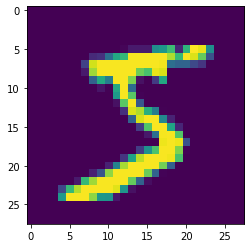

In [3]:
plt.imshow(x_train[0])

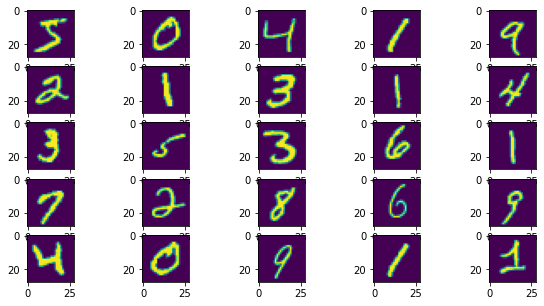

In [4]:
row = 5
col = 5
i = 0
plt.figure(figsize=(10, 5))
for r in range(row):
    for c in range(col):
        plt.subplot(row, col, i+1)
        plt.imshow(x_train[i])
        i+=1
plt.show()

Without nomalizing the value of the image metrics are between 0-255.


In [5]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [6]:
x_train , x_test = x_train.reshape(-1,28,28,1), x_test.reshape(-1,28,28,1)

In [7]:
model = keras.Sequential([
    keras.Input(shape=(28,28,1)),
    layers.Conv2D(filters=32, kernel_size=(3,3), activation ='relu'),
    
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Conv2D(filters=64, kernel_size=(3,3), activation ='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
                        ])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                102464    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                6

In [8]:
model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics='accuracy'
)

In [9]:
h= model.fit(x=x_train, y=y_train, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 9s 5ms/step - loss: 0.8579 - accuracy: 0.8843 - val_loss: 0.0715 - val_accuracy: 0.9778
Epoch 2/5
1500/1500 [==============================] - 23s 15ms/step - loss: 0.0606 - accuracy: 0.9805 - val_loss: 0.0701 - val_accuracy: 0.9790
Epoch 3/5
1500/1500 [==============================] - 19s 13ms/step - loss: 0.0432 - accuracy: 0.9863 - val_loss: 0.0685 - val_accuracy: 0.9811
Epoch 4/5
1500/1500 [==============================] - 19s 12ms/step - loss: 0.0375 - accuracy: 0.9878 - val_loss: 0.0490 - val_accuracy: 0.9862
Epoch 5/5
1500/1500 [==============================] - 19s 13ms/step - loss: 0.0269 - accuracy: 0.9915 - val_loss: 0.0605 - val_accuracy: 0.9852


Normalized:


After normalize the train data now the range of image data or metrics is between 0-1. Normalizing reduce the image metrics data or value size and now image will take less space then the previous.

In [10]:
x_train , x_test = x_train.reshape(-1,28,28,1)/255, x_test.reshape(-1,28,28,1)/255

Here you can see that all the values are normalized and convert into 0-1 range

In [11]:
print(x_train[0])

[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0. 

In [12]:
model = keras.Sequential([
    keras.Input(shape=(28,28,1)),
    layers.Conv2D(filters=32, kernel_size=(3,3), activation ='relu'),
    
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Conv2D(filters=64, kernel_size=(3,3), activation ='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
                        ])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                102464    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

Adam:


Our model with adam optimizer it can train data fast ans smoothly and can provide us 0.9981 trainig accuracy and 0.9889 accuracy in validation. The accuracy of traing data and validation data are so close and that's why we can't call it a overfit model.

In [13]:
model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics='accuracy'
)

In [14]:
h= model.fit(x=x_train, y=y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 20s 13ms/step - loss: 0.3524 - accuracy: 0.8916 - val_loss: 0.0667 - val_accuracy: 0.9803
Epoch 2/10
1500/1500 [==============================] - 22s 14ms/step - loss: 0.0509 - accuracy: 0.9837 - val_loss: 0.0500 - val_accuracy: 0.9858
Epoch 3/10
1500/1500 [==============================] - 19s 13ms/step - loss: 0.0359 - accuracy: 0.9886 - val_loss: 0.0536 - val_accuracy: 0.9845
Epoch 4/10
1500/1500 [==============================] - 20s 13ms/step - loss: 0.0247 - accuracy: 0.9920 - val_loss: 0.0356 - val_accuracy: 0.9901
Epoch 5/10
1500/1500 [==============================] - 20s 13ms/step - loss: 0.0165 - accuracy: 0.9945 - val_loss: 0.0447 - val_accuracy: 0.9876
Epoch 6/10
1500/1500 [==============================] - 20s 13ms/step - loss: 0.0128 - accuracy: 0.9959 - val_loss: 0.0370 - val_accuracy: 0.9905
Epoch 7/10
1500/1500 [==============================] - 20s 13ms/step - loss: 0.0101 - accuracy: 0.9966 - val_loss: 0.0450 -

SGD:


With SGD optimizer our model is train data faster then the previous and have some change in the accuracy train data accuracy not change that much but the validation accuracy is increased 0.9889 to 0.9920.

In [15]:
model.compile(
    optimizer='SGD',
    loss = 'sparse_categorical_crossentropy',
    metrics='accuracy'
)

In [16]:
h= model.fit(x=x_train, y=y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 20s 13ms/step - loss: 0.0039 - accuracy: 0.9986 - val_loss: 0.0440 - val_accuracy: 0.9918
Epoch 2/10
1500/1500 [==============================] - 20s 13ms/step - loss: 0.0018 - accuracy: 0.9992 - val_loss: 0.0430 - val_accuracy: 0.9921
Epoch 3/10
1500/1500 [==============================] - 19s 13ms/step - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.0430 - val_accuracy: 0.9919
Epoch 4/10
1500/1500 [==============================] - 19s 13ms/step - loss: 7.4692e-04 - accuracy: 0.9999 - val_loss: 0.0435 - val_accuracy: 0.9920
Epoch 5/10
1500/1500 [==============================] - 19s 13ms/step - loss: 9.3401e-04 - accuracy: 0.9997 - val_loss: 0.0437 - val_accuracy: 0.9918
Epoch 6/10
1500/1500 [==============================] - 20s 13ms/step - loss: 7.1238e-04 - accuracy: 0.9999 - val_loss: 0.0438 - val_accuracy: 0.9922
Epoch 7/10
1500/1500 [==============================] - 19s 13ms/step - loss: 6.4764e-04 - accuracy: 0.9998 - va

RMSProp:


with RMSProp optimizer in there have no massive change in accuracy both training and validation data as compare to the SGD. The validation acuracy decreased little bit 0.9920 to 0.9916

In [17]:
model.compile(
    optimizer='RMSProp',
    loss = 'sparse_categorical_crossentropy',
    metrics='accuracy'
)

In [18]:
h= model.fit(x=x_train, y=y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 24s 15ms/step - loss: 0.0022 - accuracy: 0.9994 - val_loss: 0.0652 - val_accuracy: 0.9918
Epoch 2/10
1500/1500 [==============================] - 21s 14ms/step - loss: 0.0014 - accuracy: 0.9995 - val_loss: 0.0724 - val_accuracy: 0.9912
Epoch 3/10
1500/1500 [==============================] - 22s 15ms/step - loss: 0.0014 - accuracy: 0.9995 - val_loss: 0.0707 - val_accuracy: 0.9918
Epoch 4/10
1500/1500 [==============================] - 21s 14ms/step - loss: 0.0011 - accuracy: 0.9996 - val_loss: 0.0727 - val_accuracy: 0.9918
Epoch 5/10
1500/1500 [==============================] - 22s 15ms/step - loss: 5.7901e-04 - accuracy: 0.9998 - val_loss: 0.0871 - val_accuracy: 0.9910
Epoch 6/10
1500/1500 [==============================] - 22s 14ms/step - loss: 4.5241e-04 - accuracy: 0.9998 - val_loss: 0.0806 - val_accuracy: 0.9922
Epoch 7/10
1500/1500 [==============================] - 22s 14ms/step - loss: 8.5083e-04 - accuracy: 0.9998 - val_lo